In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file into a DataFrame
df = pd.read_csv('data/blockchain_difficulty.csv') # columns = ['Date', 'difficulty', 'market-price']

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format="ISO8601")

# Set the 'Date' column as the index for better plotting control
df.set_index('Date', inplace=True)

df['price-ratio'] = df['market-price'].replace(0, np.nan) / df['difficulty'].replace(0, np.nan)

# Avoid log of zero: replace 0 with NaN for calculation, which will be ignored
df['log-difficulty'] = np.log(df['difficulty'].replace(0, np.nan))
df['log-price'] = np.log(df['market-price'].replace(0, np.nan))

# Add column log-price-ratio from log-price / log-difficulty, excluding NaNs
# Add column log-price-ratio from log-price / log-difficulty, excluding NaNs and zero values
df['log-price-ratio'] = np.log(df['market-price'].replace(0, np.nan) / df['difficulty'].replace(0, np.nan))

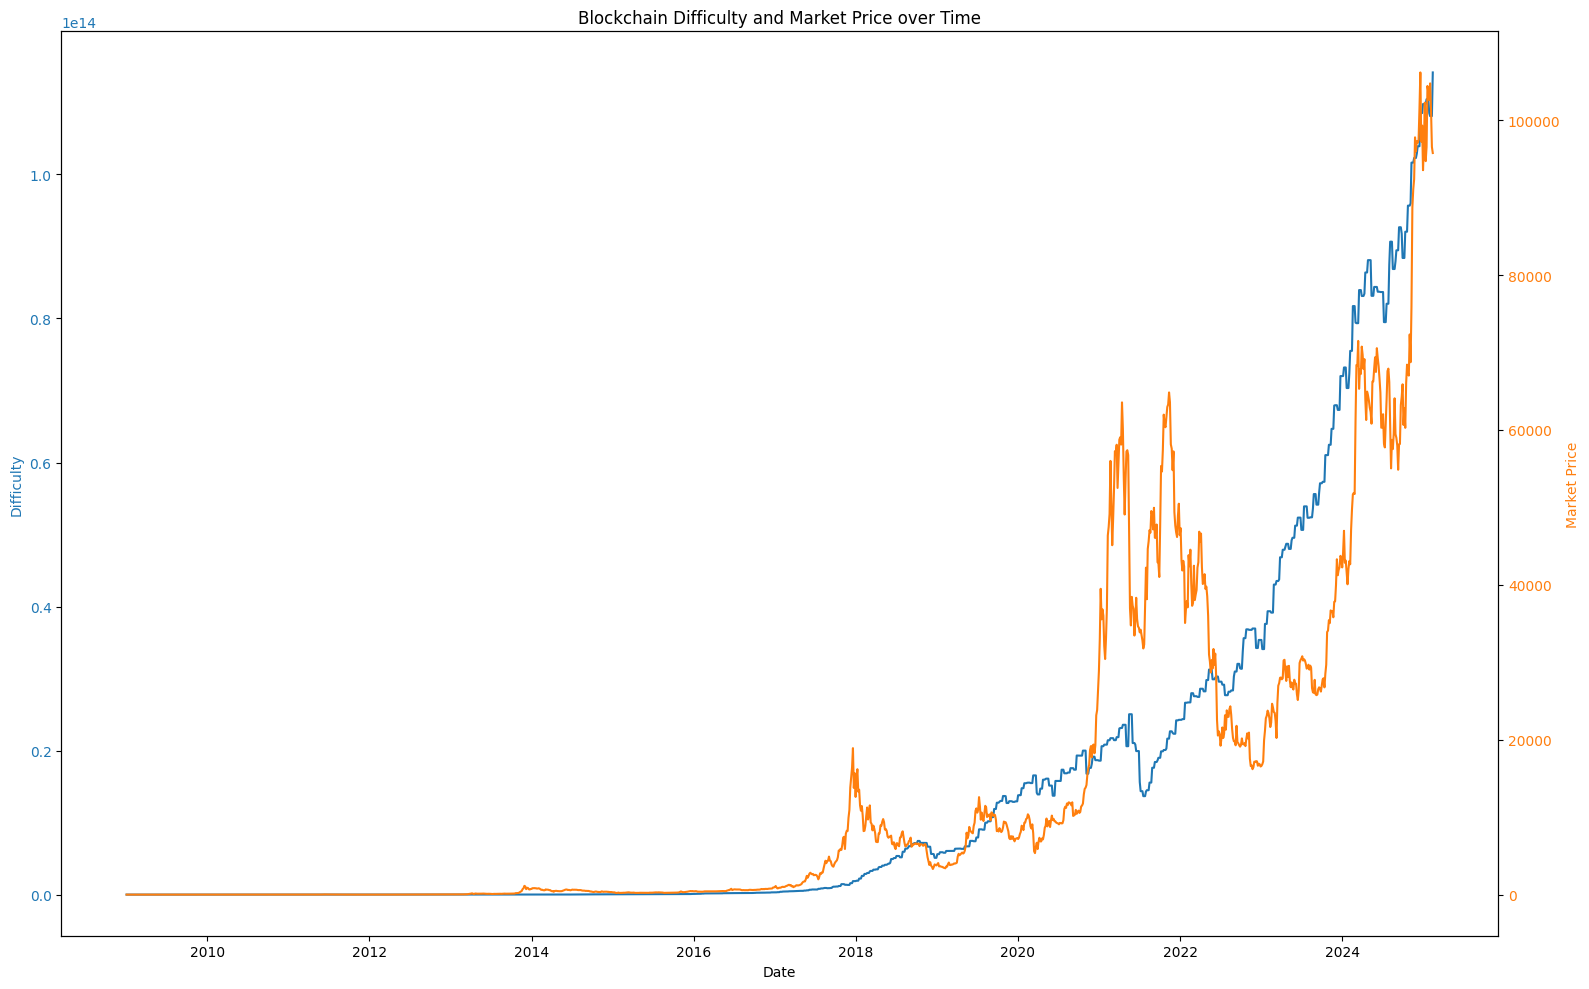

In [75]:
# Create a figure and a set of subplots with two y-axes
fig, ax1 = plt.subplots(figsize=(16, 10))  # Adjust plot size to 16x10

# Plot 'difficulty' on the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Difficulty', color='tab:blue')
ax1.plot(df.index, df['difficulty'], color='tab:blue', label='Difficulty')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Market Price', color='tab:orange')
ax2.plot(df.index, df['market-price'], color='tab:orange', label='Market Price')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add a title and display the plot
plt.title("Blockchain Difficulty and Market Price over Time")
fig.tight_layout()  # Adjust layout to prevent overlap
plt.show()

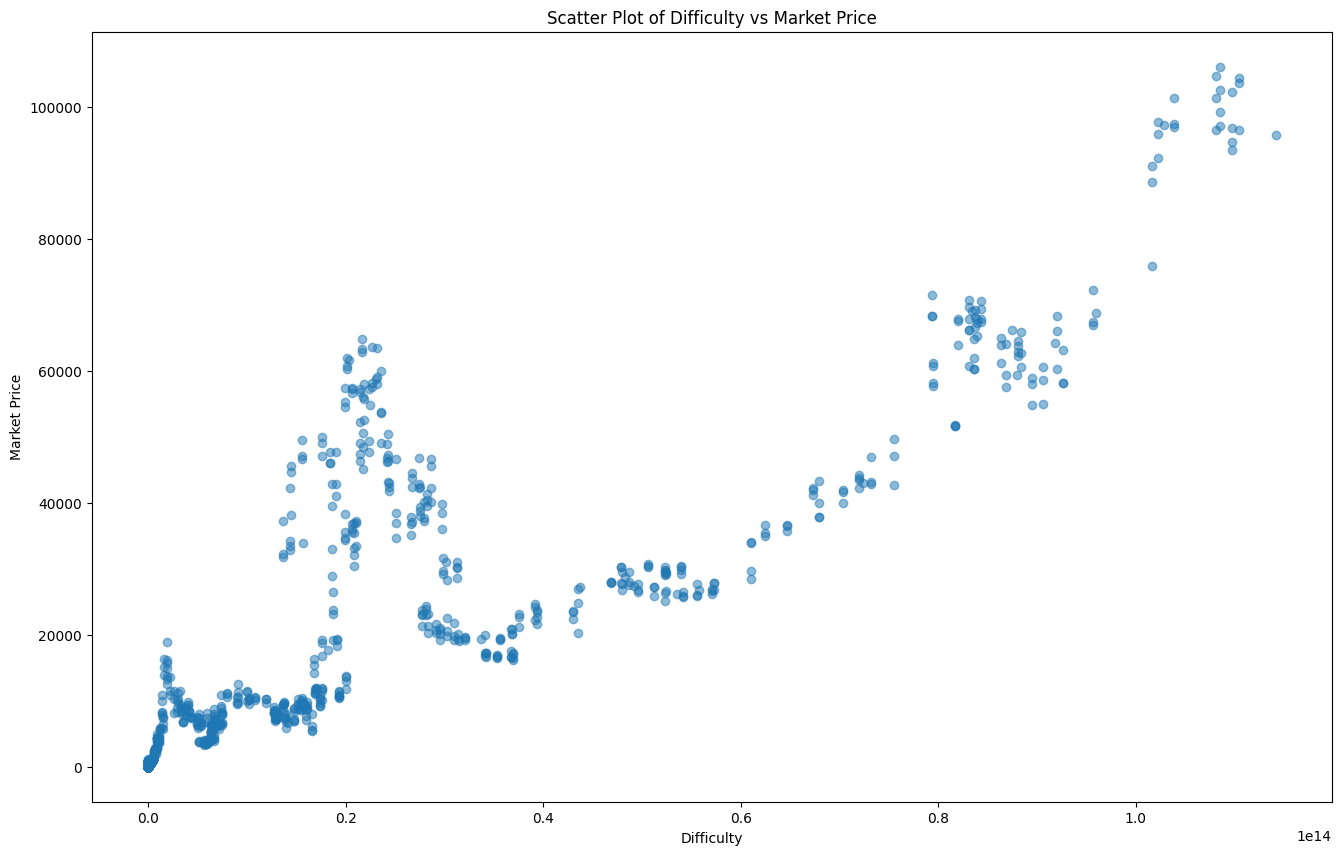

In [76]:
# Create a scatter plot for difficulty vs market-price
plt.figure(figsize=(16, 10))  # Adjust plot size to 16x10
plt.scatter(df['difficulty'], df['market-price'], alpha=0.5)

# Add labels and title
plt.xlabel('Difficulty')
plt.ylabel('Market Price')
plt.title("Scatter Plot of Difficulty vs Market Price")

# Display the plot
plt.show()

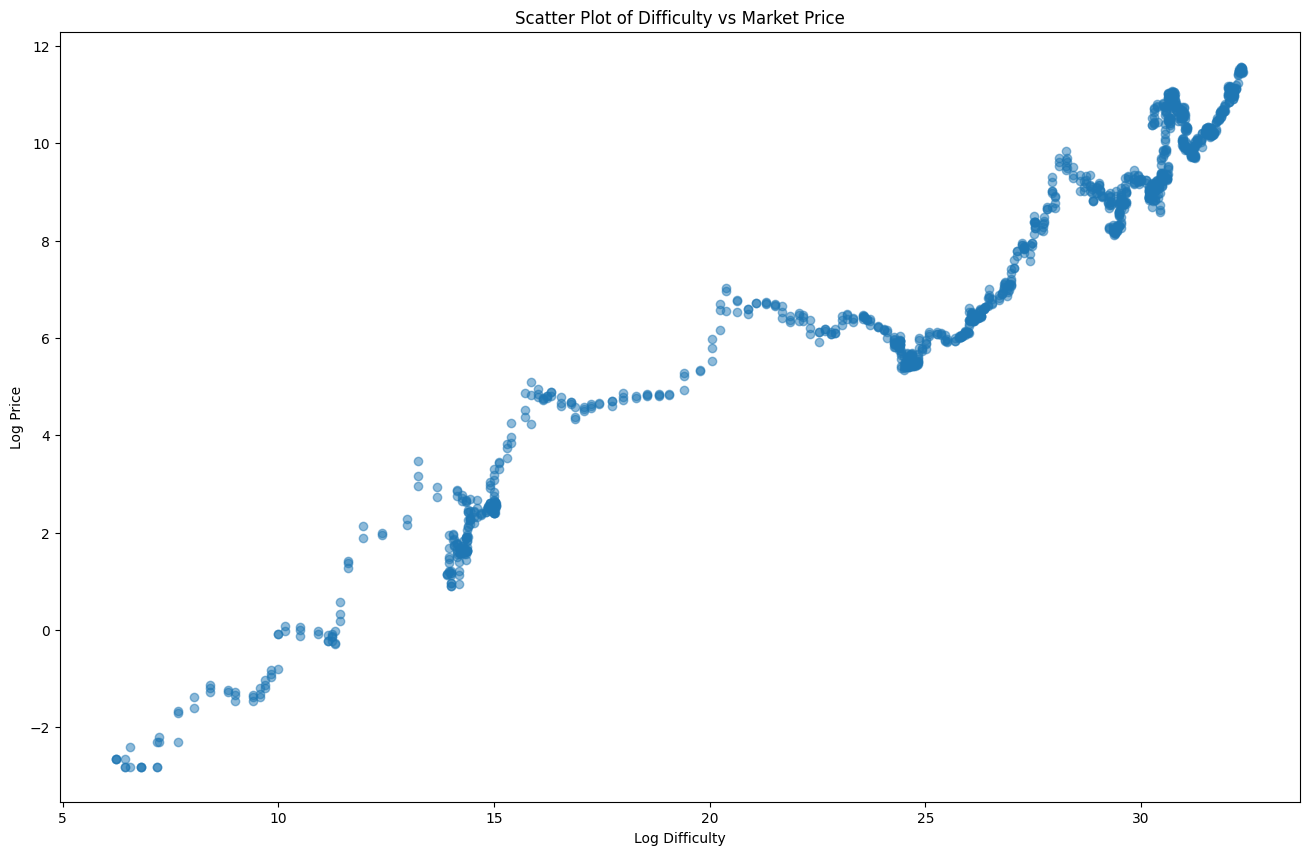

In [77]:
# Create a scatter plot for difficulty vs market-price
plt.figure(figsize=(16, 10))  # Adjust plot size to 16x10
plt.scatter(df['log-difficulty'], df['log-price'], alpha=0.5)

# Add labels and title
plt.xlabel('Log Difficulty')
plt.ylabel('Log Price')
plt.title("Scatter Plot of Difficulty vs Market Price")

# Display the plot
plt.show()

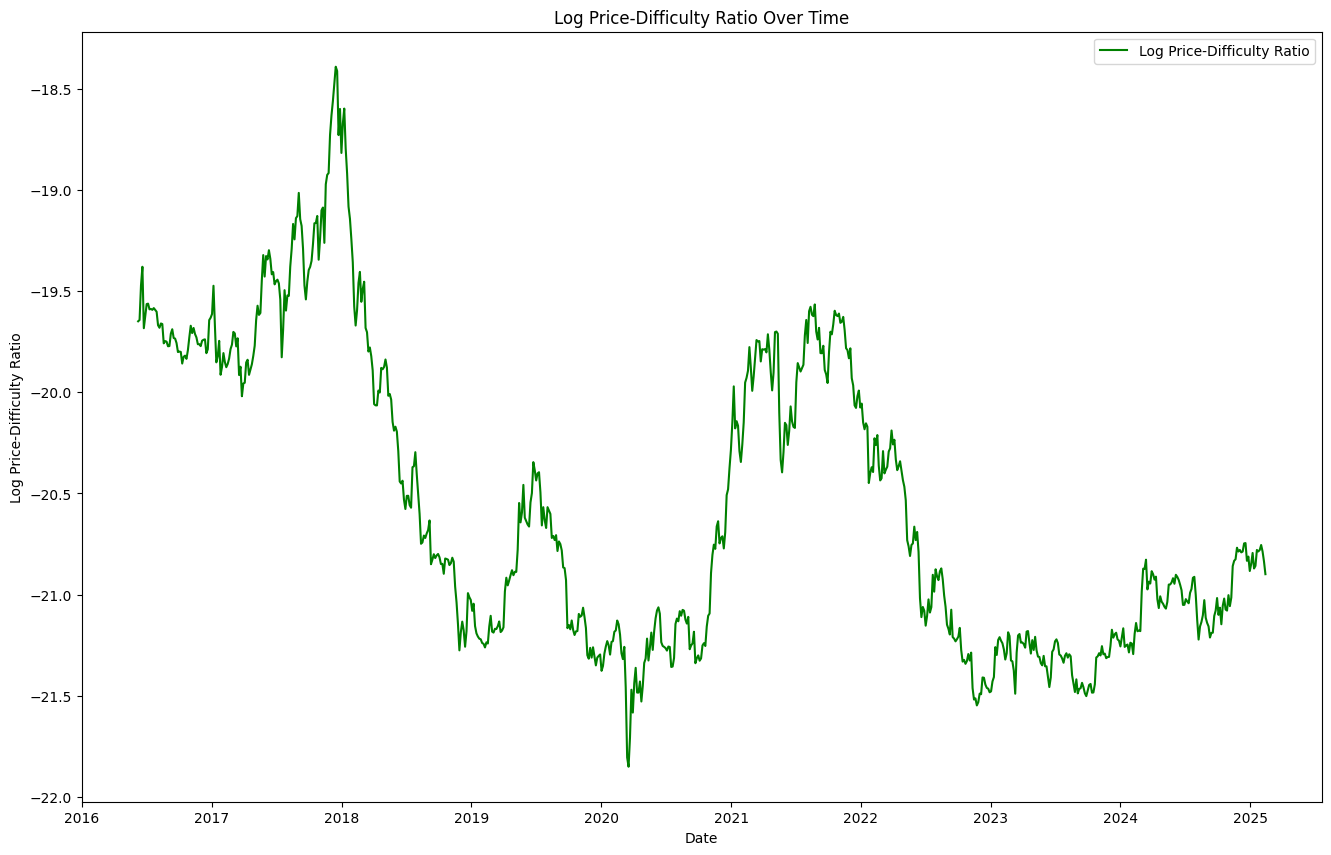

In [81]:
# Create a new filtered DataFrame for dates greater than 1 January 2016
df_filtered = df[(df.index > '2016-06-04')] #(df.index < '2018-06-04')

# Create a figure and plot 'log-price-ratio' over time
plt.figure(figsize=(16, 10))  # Adjust plot size to 16x10

# Plot 'log-price-ratio' over time
plt.plot(df_filtered.index, df_filtered['log-price-ratio'], label='Log Price-Difficulty Ratio', color='green')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Log Price-Difficulty Ratio')
plt.title('Log Price-Difficulty Ratio Over Time')

# Add legend
plt.legend()

# Display the plot
plt.show()


Kolmogorov-Smirnov test for log-price-ratio being log-normal:
Statistic: 0.1365797991951178, p-value: 2.2186605373331693e-13

Kolmogorov-Smirnov test: log-price does not appear to follow a lognormal distribution.


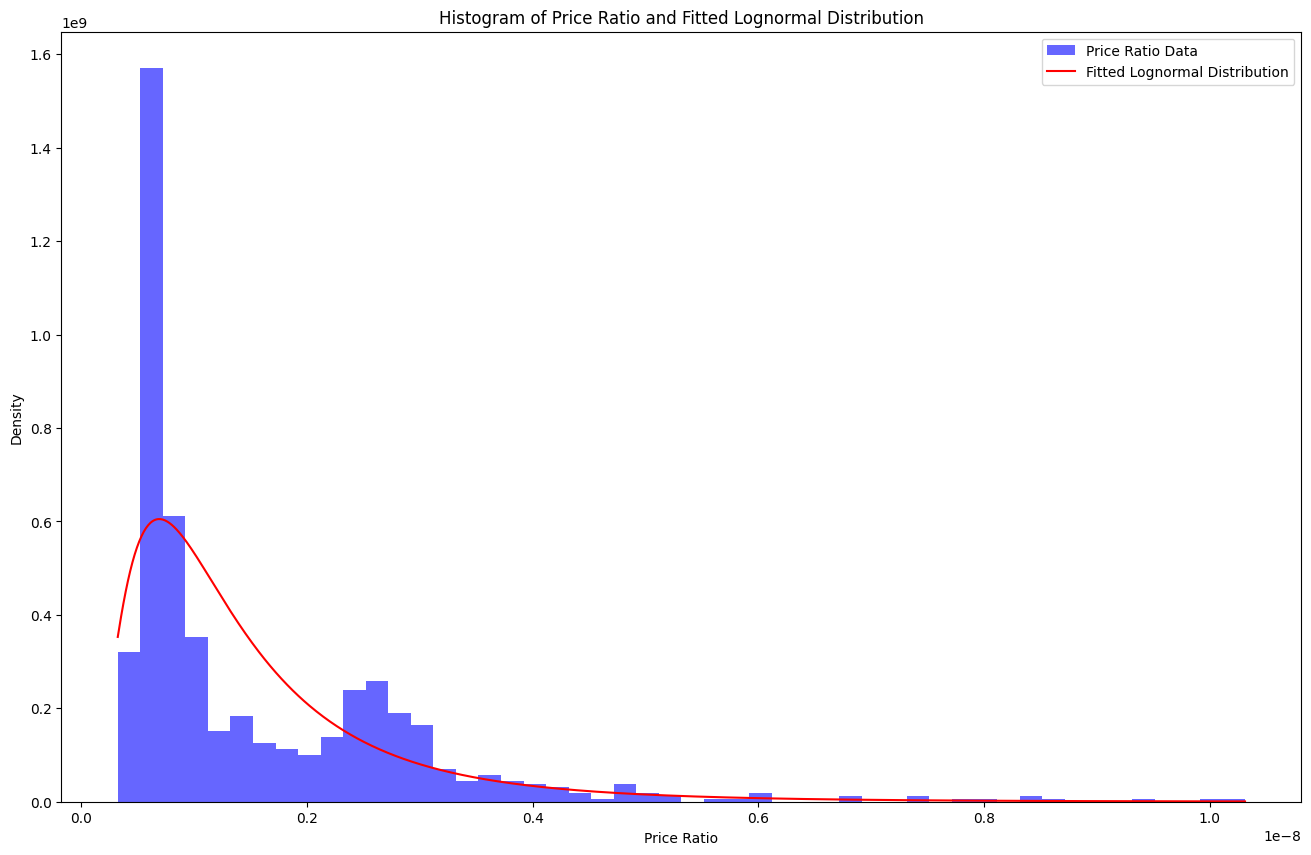

In [85]:
from scipy.stats import kstest, lognorm
import numpy as np

# Exclude NaN values for the tests
price_ratio = df_filtered['price-ratio'].dropna()

# Lognormal test (Kolmogorov-Smirnov Goodness of Fit)
shape, loc, scale = lognorm.fit(price_ratio, floc=0)  # Fit log-normal parameters
lognormal_cdf = lambda x: lognorm.cdf(x, shape, loc=loc, scale=scale)
stat3, p = kstest(price_ratio, lognormal_cdf)
print("\nKolmogorov-Smirnov test for log-price-ratio being log-normal:")
print(f"Statistic: {stat3}, p-value: {p}")

# Interpret the results for all tests
alpha = 0.05
if p > alpha:
    print("\nKolmogorov-Smirnov test: log-price appears to follow a lognormal distribution.")
else:
    print("\nKolmogorov-Smirnov test: log-price does not appear to follow a lognormal distribution.")

# Plot a histogram of the price_ratio and the fitted lognormal distribution
plt.figure(figsize=(16, 10))  # Adjust size of the plot

# Plot histogram of the data
count, bins, _ = plt.hist(price_ratio, bins=50, density=True, alpha=0.6, color='blue', label="Price Ratio Data")

# Overlay the fitted lognormal distribution
x = np.linspace(min(price_ratio), max(price_ratio), 1000)
pdf = lognorm.pdf(x, shape, loc=loc, scale=scale)  # Fitted PDF
plt.plot(x, pdf, 'r-', label='Fitted Lognormal Distribution')

# Add title and labels
plt.title('Histogram of Price Ratio and Fitted Lognormal Distribution')
plt.xlabel('Price Ratio')
plt.ylabel('Density')

# Add legend
plt.legend()

# Display the plot
plt.show()

C:\dev\crypto-series\btc-model\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:6902: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


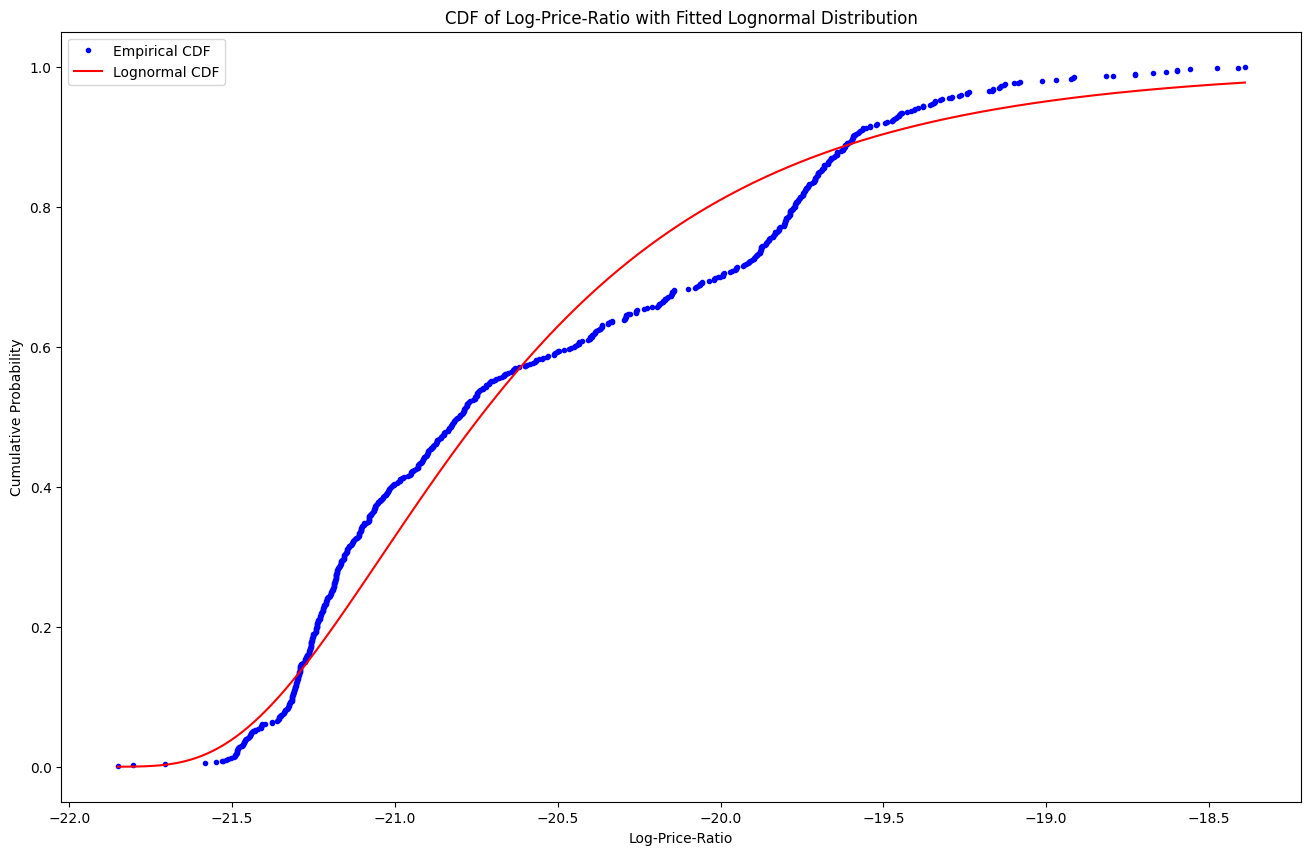

In [86]:
from scipy.stats import lognorm

# Exclude NaN values and filter the log-price-ratio
log_price_ratio = df_filtered['log-price-ratio'].dropna()

# Create a figure for the CDF plot
plt.figure(figsize=(16, 10))

# Plot the empirical CDF of 'log-price-ratio'
sorted_values = np.sort(log_price_ratio)
y_vals = np.arange(1, len(sorted_values) + 1) / len(sorted_values)
plt.plot(sorted_values, y_vals, marker='.', linestyle='none', label='Empirical CDF', color='blue')

# Fit a lognormal distribution to 'log-price-ratio'
shape, loc, scale = lognorm.fit(log_price_ratio)
x_vals = np.linspace(sorted_values.min(), sorted_values.max(), 1000)
cdf_vals = lognorm.cdf(x_vals, shape, loc=loc, scale=scale)

# Plot the fitted lognormal CDF
plt.plot(x_vals, cdf_vals, label='Lognormal CDF', color='red')

# Add labels, title, and legend
plt.xlabel('Log-Price-Ratio')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Log-Price-Ratio with Fitted Lognormal Distribution')
plt.legend()

# Display the plot
plt.show()

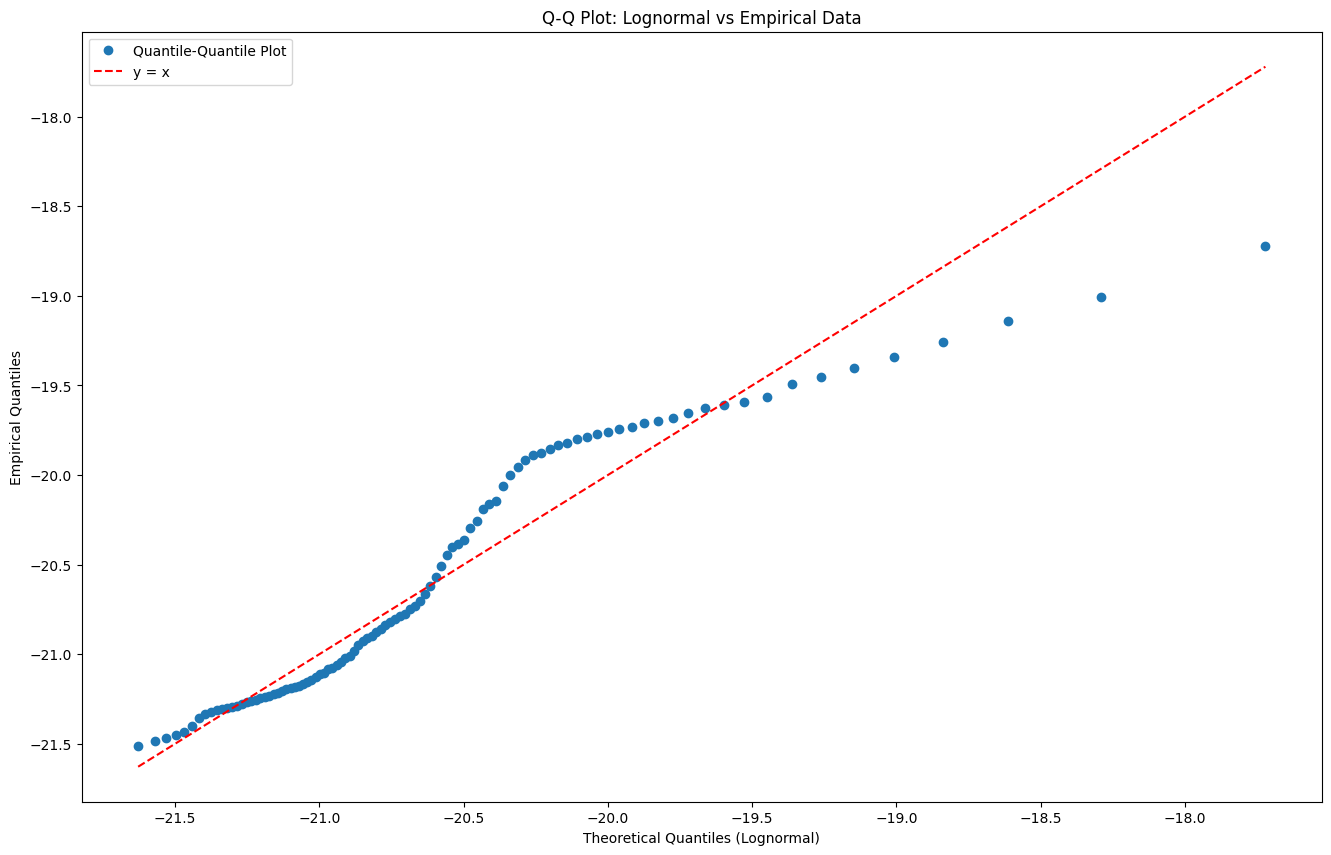

In [84]:
from scipy.stats import lognorm

# Calculate the quantiles for the lognormal distribution and empirical data
quantiles_lognorm = lognorm.ppf(np.arange(0.01, 1, 0.01), s=shape, loc=loc, scale=scale)  # Avoid zero in range
quantiles_y_vals = np.quantile(sorted_values, np.arange(0.01, 1, 0.01))  # Match range with quantiles_lognorm

# Create a figure for the quantile-quantile plot
plt.figure(figsize=(16, 10))
plt.plot(quantiles_lognorm, quantiles_y_vals, marker='o', linestyle='', label='Quantile-Quantile Plot')

# Plot y = x on the chart for reference
plt.plot(quantiles_lognorm, quantiles_lognorm, color='red', linestyle='--', label='y = x')

# Add labels, title, and legend
plt.xlabel('Theoretical Quantiles (Lognormal)')
plt.ylabel('Empirical Quantiles')
plt.title('Q-Q Plot: Lognormal vs Empirical Data')
plt.legend()

# Display the plot
plt.show()